In [9]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Connect to Database and Process the data

In [3]:
#Connecting Database instance 
conn = sqlite3.connect('Database/delhi.sqlite')

In [4]:
#Creating the cursor
c = conn.cursor()

In [5]:
#Creating the DataFrame
query = conn.execute("SELECT * From delhi_table")
cols = [column[0] for column in query.description]
df= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
data = df.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80657 entries, 0 to 80656
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime_utc  80657 non-null  object 
 1   conds         80657 non-null  object 
 2   dewptm        80657 non-null  float64
 3   fog           80657 non-null  int64  
 4   hail          80657 non-null  int64  
 5   hum           80657 non-null  float64
 6   pressurem     80657 non-null  float64
 7   rain          80657 non-null  int64  
 8   snow          80657 non-null  int64  
 9   tempm         80657 non-null  float64
 10  thunder       80657 non-null  int64  
 11  tornado       80657 non-null  int64  
 12  vism          80657 non-null  float64
 13  wdird         80657 non-null  float64
 14  wdire         80657 non-null  object 
 15  wspdm         80657 non-null  float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ MB


In [7]:
data.head()

,datetime_utc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm
0,19961101-11:00,Haze,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,19961101-16:00,Haze,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0
2,19961101-18:00,Haze,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,North,0.0
3,19961102-02:00,Haze,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,SSW,9.3
4,19961102-03:00,Haze,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,WSW,9.3


<AxesSubplot:>

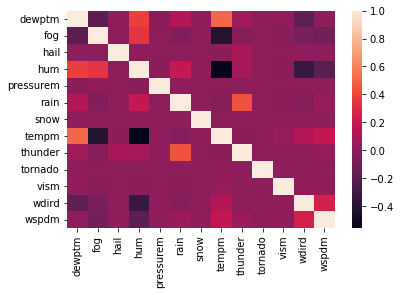

In [10]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=False)

In [11]:
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'])
data.set_index('datetime_utc', inplace= True)
data_df =data.resample('D').mean()

In [12]:
data_df.head()

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
datetime_utc,,,,,,,,,,,,,
1996-11-01,11.000000,0.0,0.0,44.666667,1010.333333,0.0,0.0,24.666667,0.0,0.0,2.333333,93.333333,2.466667
1996-11-02,10.333333,0.0,0.0,47.190476,1009.809524,0.0,0.0,23.380952,0.0,0.0,3.476190,121.904762,8.028571
1996-11-03,12.136364,0.0,0.0,54.681818,1010.500000,0.0,0.0,22.272727,0.0,0.0,2.286364,116.363636,4.804545
1996-11-04,10.133333,0.0,0.0,46.600000,1011.333333,0.0,0.0,23.133333,0.0,0.0,2.326667,66.666667,2.226667
1996-11-05,8.200000,0.0,0.0,29.400000,1011.800000,0.0,0.0,27.800000,0.0,0.0,3.900000,208.000000,10.020000


In [13]:
data_df = data_df[['tempm']]

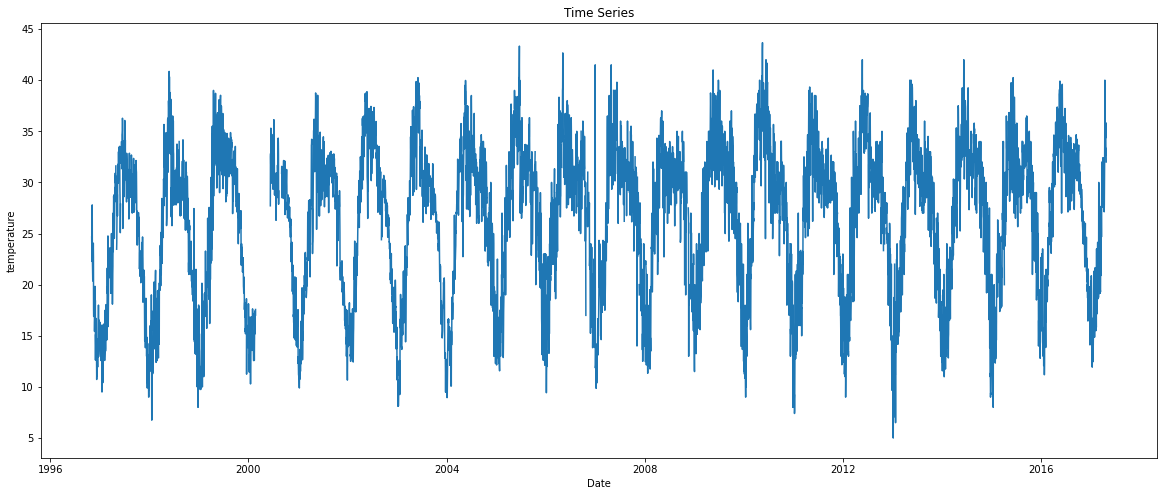

In [14]:
plt.figure(figsize=(20,8))
plt.plot(data_df)
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('temperature')
plt.show()

In [15]:
temp_annual = data['tempm'].resample("AS").agg(['mean', 'min', 'max'])

In [16]:
temp_annual.head()

,mean,min,max
datetime_utc,,,
1996-01-01,16.723062,4.0,34.0
1997-01-01,24.702072,5.0,43.0
1998-01-01,25.321593,5.0,72.0
1999-01-01,27.793387,6.0,63.0
2000-01-01,24.168488,5.0,41.0


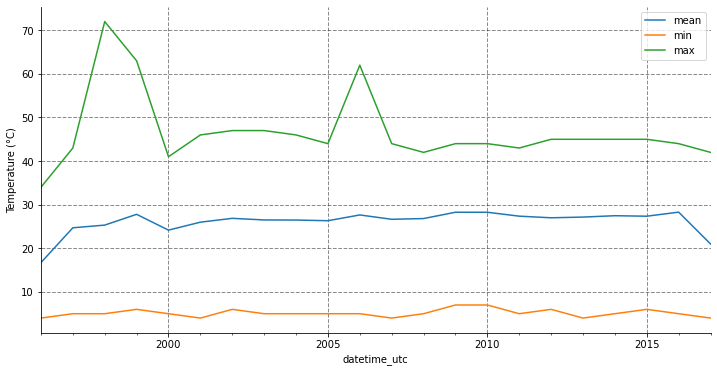

In [17]:
temp_annual.plot(figsize=(12, 6))
ax = plt.gca()
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel("Temperature (°C)")
sns.despine()

This line graph visualises outliers in the dataset and it also shows that the outliers dont deeply affect the mean of the dataset. Due to the outliers hardly affecting the mean, we will leave them in the dataset.

In [18]:
data.describe()

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
count,80657.000000,80657.000000,80657.000000,80657.000000,8.065700e+04,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000
mean,15.676445,0.050907,0.000136,55.171926,2.199730e+03,0.027102,0.000012,26.340045,0.010216,0.000025,2.563318,169.093891,8.976131
std,7.150146,0.219809,0.011677,23.447379,3.558458e+05,0.162383,0.003521,8.242780,0.100558,0.004980,22.690289,118.166457,12.084670
min,-24.000000,0.000000,0.000000,4.000000,-9.999000e+03,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,36.000000,1.001000e+03,0.000000,0.000000,20.000000,0.000000,0.000000,1.800000,60.000000,3.700000
50%,15.000000,0.000000,0.000000,55.000000,1.008000e+03,0.000000,0.000000,28.000000,0.000000,0.000000,2.200000,170.000000,7.400000
75%,22.000000,0.000000,0.000000,74.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.000000,3.000000,270.000000,13.000000
max,35.000000,1.000000,1.000000,100.000000,1.010614e+08,1.000000,1.000000,72.000000,1.000000,1.000000,6436.000000,960.000000,1514.900000


In [19]:
# Extracting the year 
def extract_year(value):
    return (value[0:4])
df["year"] = df["datetime_utc"].apply(lambda x:extract_year(x))

In [20]:
# Extracting month
def extract_month(value):
    return (value[4:6])
df["month"] = df["datetime_utc"].apply(lambda x:extract_month(x))

In [21]:
df.head()

,datetime_utc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm,year,month
0,19961101-11:00,Haze,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11
1,19961101-16:00,Haze,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11
2,19961101-18:00,Haze,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,North,0.0,1996,11
3,19961102-02:00,Haze,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,SSW,9.3,1996,11
4,19961102-03:00,Haze,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,WSW,9.3,1996,11


In [22]:
df.dtypes

datetime_utc     object
conds            object
dewptm          float64
fog               int64
hail              int64
hum             float64
pressurem       float64
rain              int64
snow              int64
tempm           float64
thunder           int64
tornado           int64
vism            float64
wdird           float64
wdire            object
wspdm           float64
year             object
month            object
dtype: object

In [23]:
# Dropping three columns 'datetime_utc', 'wdire', 'Unnamed: 0'
df = df.drop(['datetime_utc', 'wdire'], axis =1)
df.head()

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm,year,month
0,Haze,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,7.4,1996,11
1,Haze,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,0.0,1996,11
2,Haze,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,0.0,1996,11
3,Haze,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,9.3,1996,11
4,Haze,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,9.3,1996,11


In [24]:
df.columns

Index(['conds', 'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wspdm', 'year',
       'month'],
      dtype='object')

In [25]:
ordered_columns = ['year','month', 'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wspdm', 'conds']
df = df[ordered_columns]

In [26]:
df.head()

,year,month,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm,conds
0,1996,11,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,7.4,Haze
1,1996,11,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,0.0,Haze
2,1996,11,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,0.0,Haze
3,1996,11,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,9.3,Haze
4,1996,11,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,9.3,Haze


In [27]:
df.conds.value_counts()

Haze      65925
Rain       6022
Cloudy     5832
Clear      2878
Name: conds, dtype: int64

In [28]:
# Create our features
X = df.drop("conds", axis=1)

# Create our target
y = df["conds"]

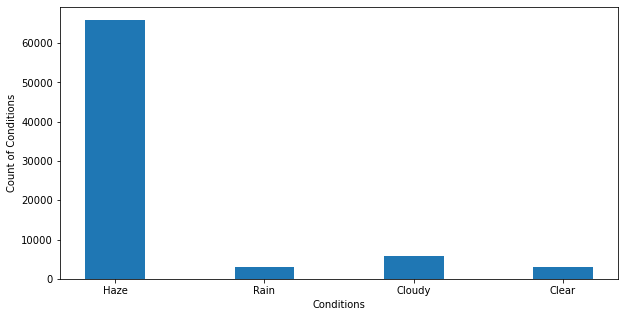

In [29]:
data = {'Haze':65925, 'Rain':3022, 'Cloudy':5832,
        'Clear':2878}
conditions = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(conditions, values,
        width = 0.4)
 
plt.xlabel("Conditions")
plt.ylabel("Count of Conditions")
plt.show()

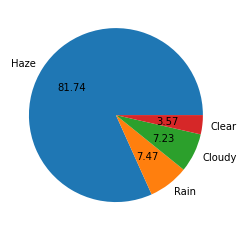

In [31]:
i = y.value_counts()
plt.pie(i, labels=['Haze', 'Rain', 'Cloudy', 'Clear'], autopct='%.2f')
plt.show()

This pie chart shows an imbalanced dataset with about 82% of the data belonging to one particular class.